### ✍ В предыдущих юнитах мы познакомились с одним из видов ансамблевых методов — бэггингом. Пришло время поговорить ещё об одном типе ансамблей — **бустинге**.

В целом, идеи бустинга и бэггинга очень похожи: в обоих случаях мы берём слабые модели и объединяем их для получения более качественного прогноза. Однако есть одно ключевое различие:

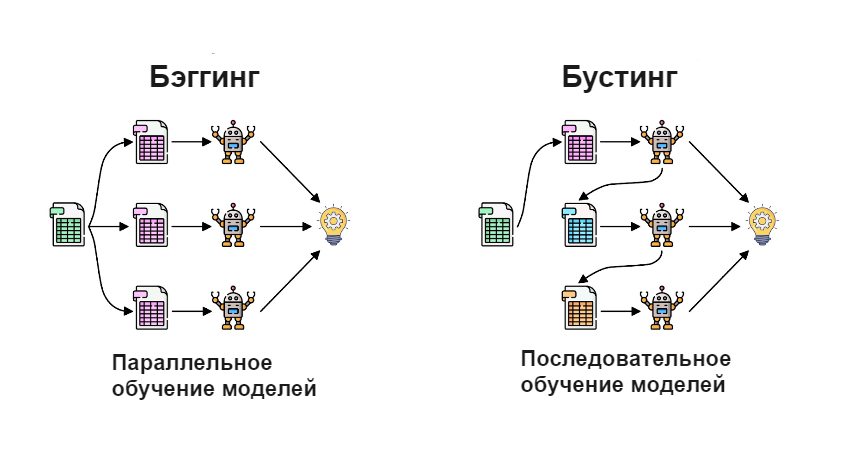

## В **бэггинге** все модели обучаются одновременно, независимо и параллельно. В качестве итогового предсказания берётся усреднённый ответ (в задаче регрессии) или делается прогноз по большинству голосов (в задаче классификации).

## В **бустинге** все модели обучаются поочерёдно, причём каждая последующая старается исправить ошибки, совершённые предыдущими.

В примере ниже гольфист сначала пытается забить мяч в лунку в точкe $y$, но добирается только до координаты $f_1(x)$. Здесь отверстие в точке $y$ является целевой переменной. После переоценки направления и расстояния до лунки после каждого удара игрок несколько раз бьёт по мячу, более мягко направляя его к лунке, и так до тех пор, пока не попадёт в лунку.

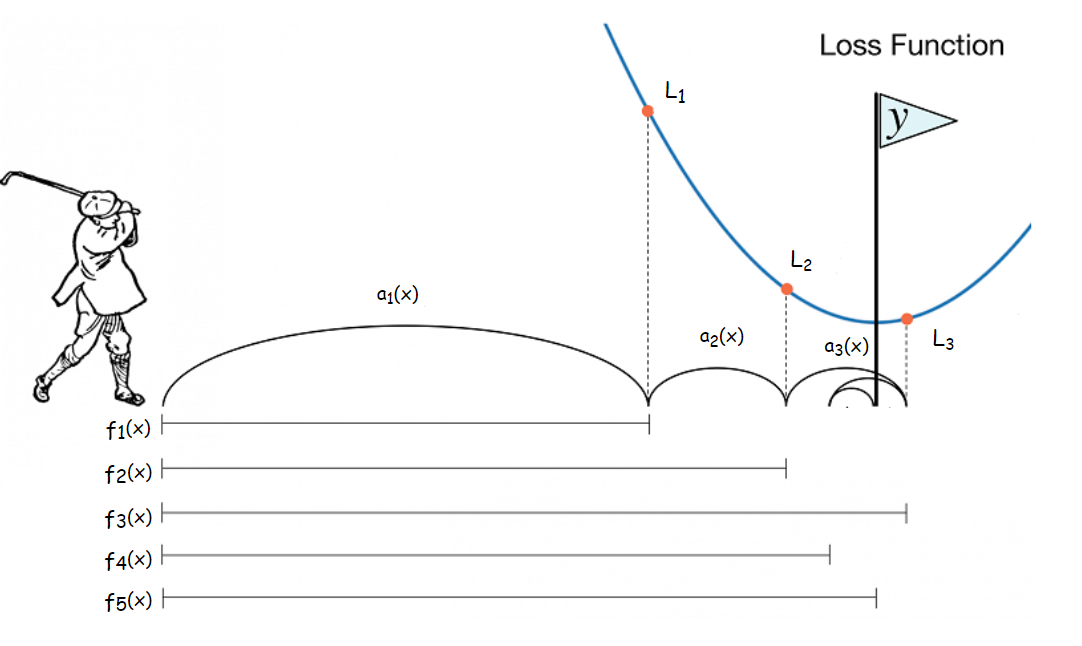

Основная концепция бустинга вам знакома, поэтому перейдём к его математической составляющей, но прежде необходимо вспомнить ещё одну особенность бустинга ↓

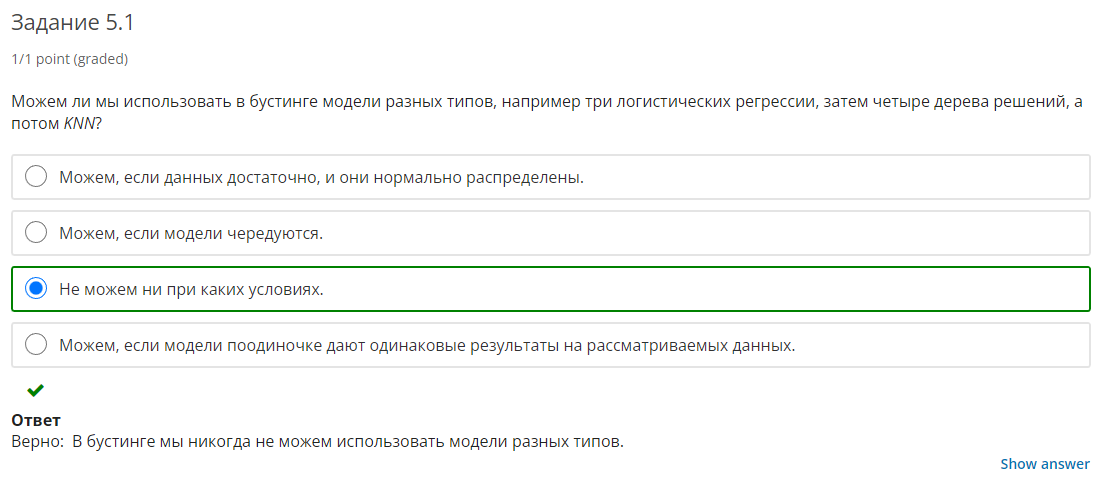

Теперь мы можем перейти к рассмотрению вариаций бустинга и их математической основы.

# **ADABOOST**

Первый ансамбль типа бустинг, который мы рассмотрим, называется **AdaBoost (Adaptive Boosting)**.

## **Бустинг** позволяет из большого количества относительно слабых и простых моделей получить одну сильную. В нашем случае будут рассматриваться деревья решений ограниченной глубины (всего из одного уровня) — их ещё называют **пнями**.

Для начала давайте вспомним общую логику реализации данного алгоритма, а уже потом сформулируем его математически.

Представим, что у нас есть изначальные данные двух классов: здоровые пациенты (обозначены минусом) и пациенты с диагностированным заболеванием (обозначены плюсом). Мы пытаемся решить задачу классификации. Как можно видеть на графиках ниже, результат первой слабой модели не очень удачный:

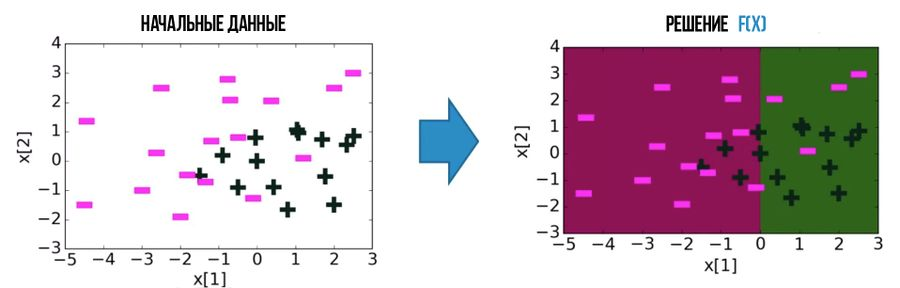

Тогда мы пересчитываем коэффициенты таким образом, чтобы уделить больше всего внимания именно тем наблюдениям, прогнозы для которых были сформированы неверно. На схеме ниже некоторые плюсы и минусы увеличились в размере — это иллюстрирует то, что мы увеличили их веса. После этого мы берём очередную слабую модель и строим новое предсказание (оно справа):

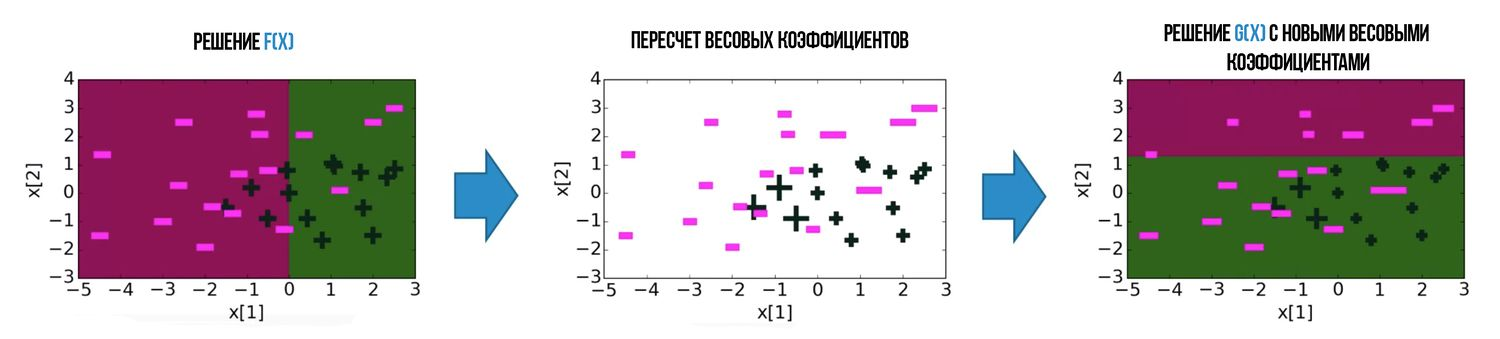

Как видим, результат получился снова не очень хорошим, однако он нивелировал некоторые ошибки, допущенные первым классификатором.  После двух итераций итог следующий:

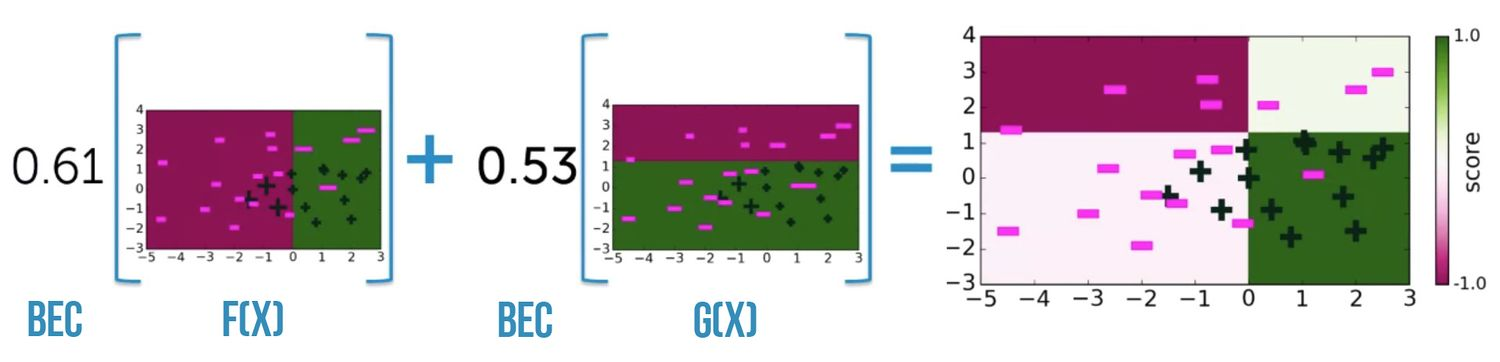

Здесь $f(x)$ и $g(x)$ — результаты применения алгоритмов классификации.

То, что находится в цветной зоне, мы уже с достаточно высокой точностью можем отнести к верному классу. Однако нам необходимо повторять подключение новых моделей, чтобы классифицировать остальные объекты.

Добавляя новые пни, мы в итоге можем добиться достаточно качественного разбиения спустя 30 итераций:

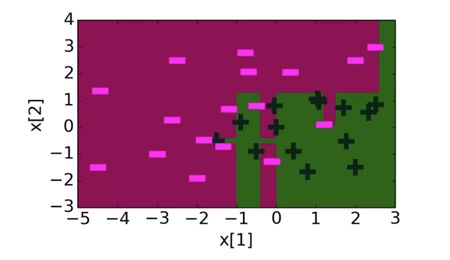

Теперь, когда мы повторили смысл алгоритма AdaBoost, давайте обратимся к его математической составляющей и пропишем сам алгоритм:

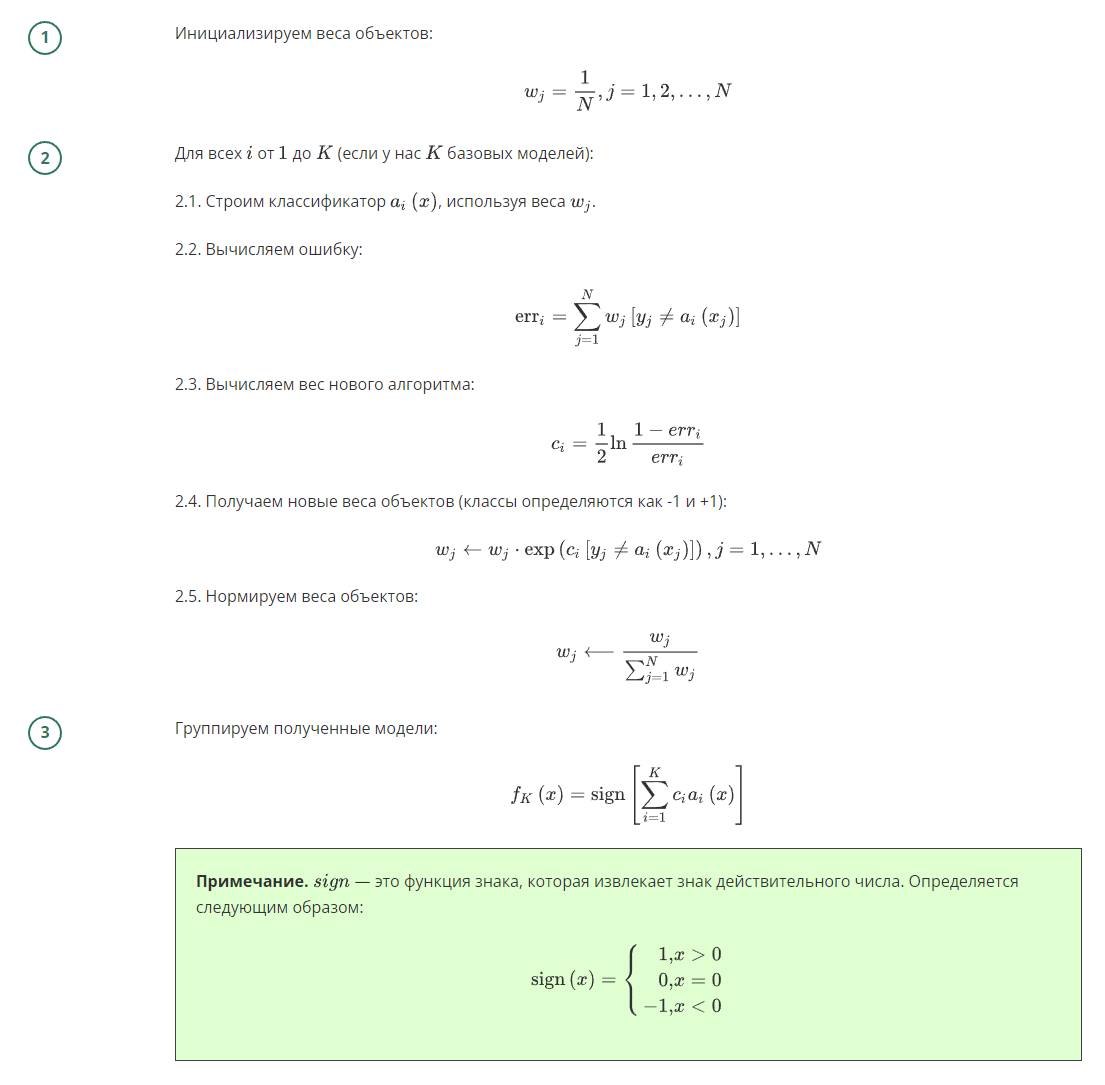

Для лучшего понимания рассмотрим работу алгоритма на «игрушечном» примере ↓

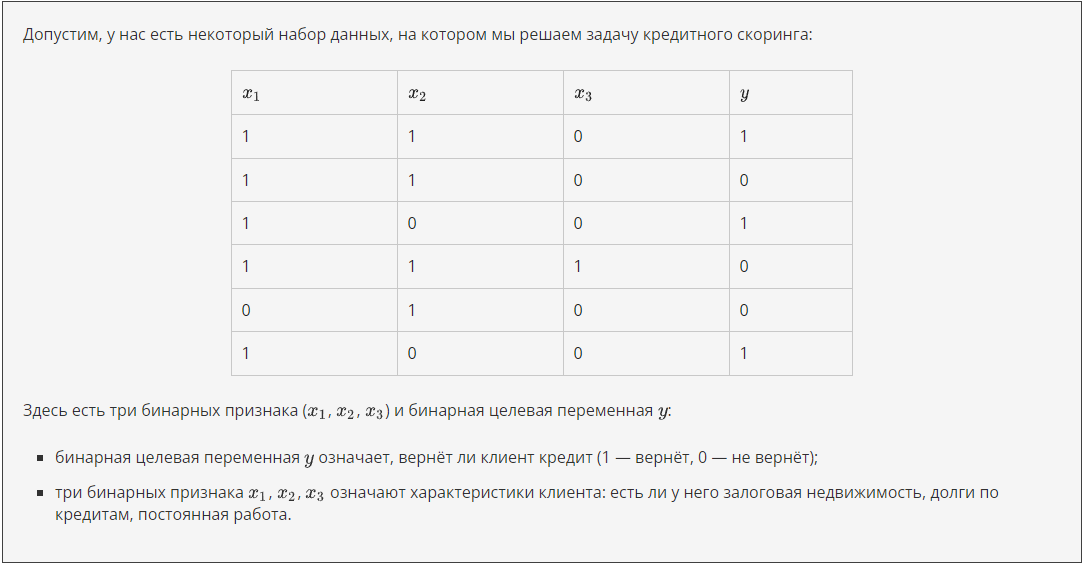
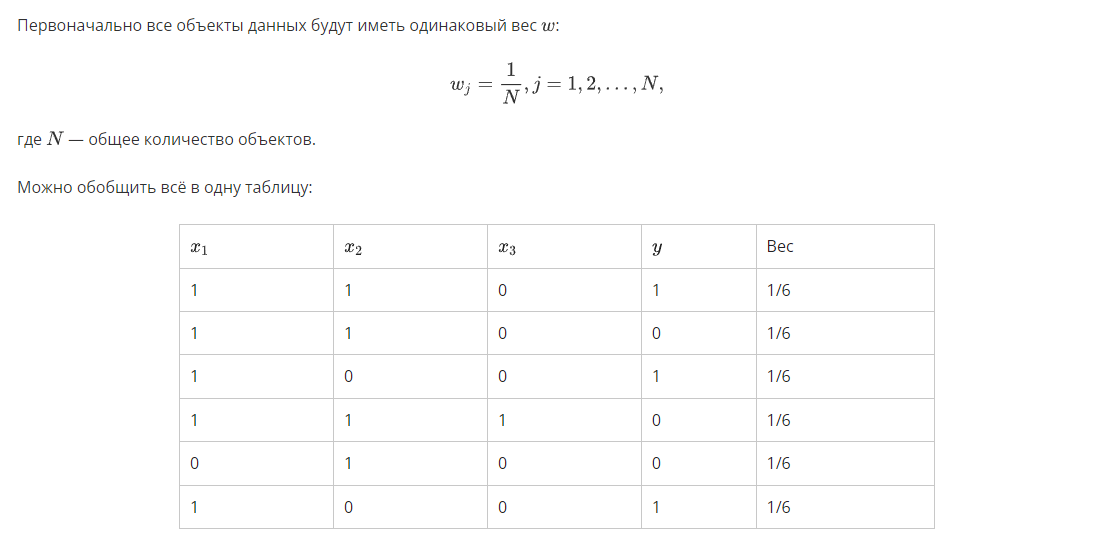



Далее необходимо вычислить, например, значение критерия Джини, чтобы определить, какую переменную использовать для создания первого пня (так как этот коэффициент используется в деревьях решений как критерий качества разбиения). Напомним, что формула критерия Джини выражается следующим образом:

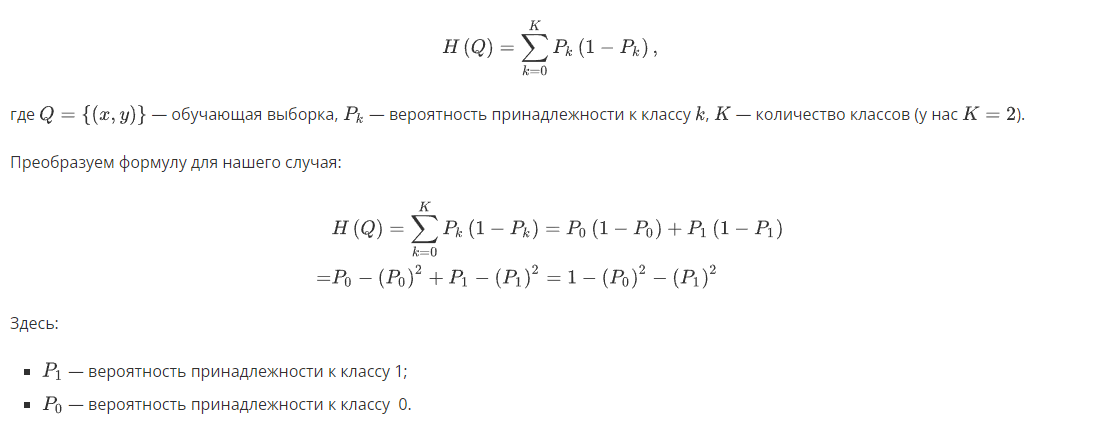

После того как вычислен критерий Джини для каждой вершины, **взвешенная неоднородность вычисляется как средневзвешенное значение**.

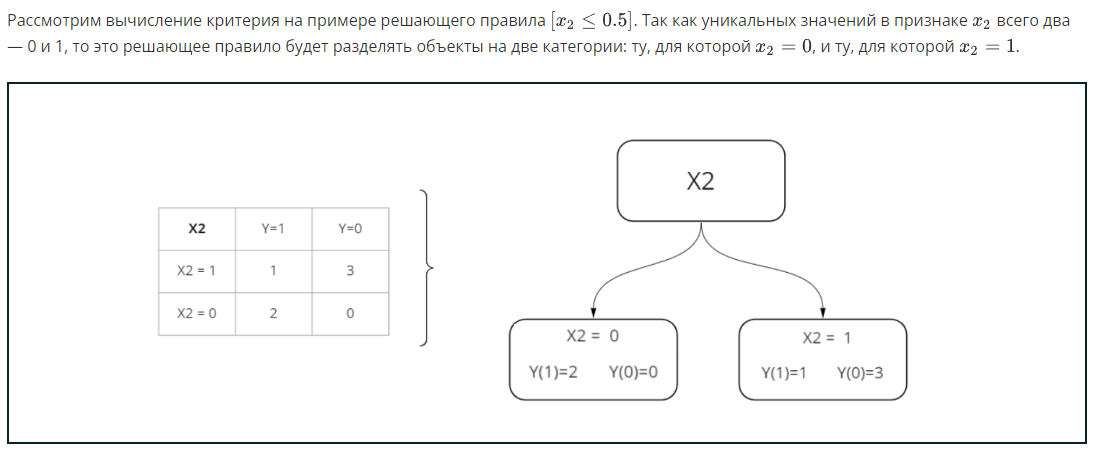

Выше приведена сводная таблица объектов, в которой показано количество наблюдений, попадающих в каждую категорию.

Далее мы можем вычислить критерий Джини каждого значения признака $x_2$:

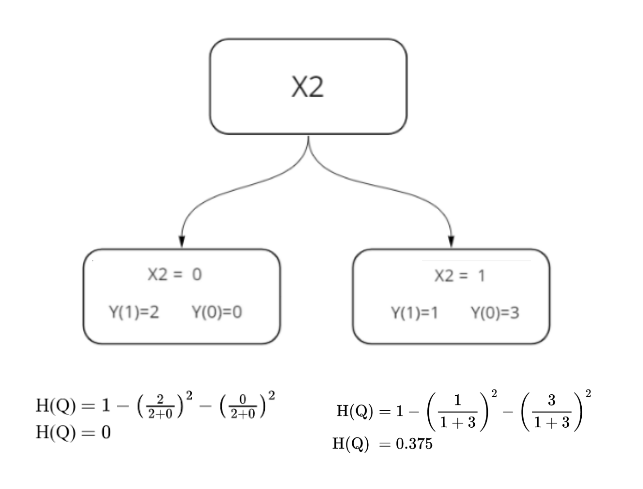
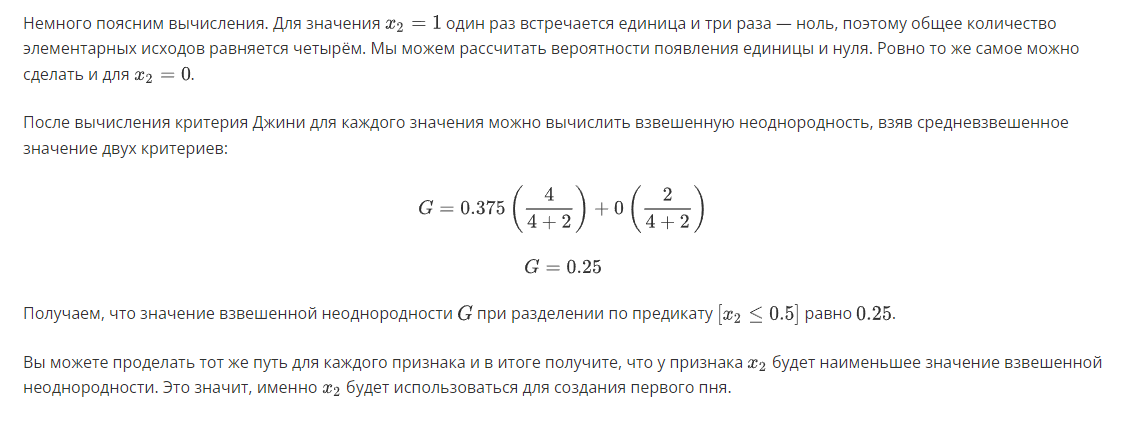

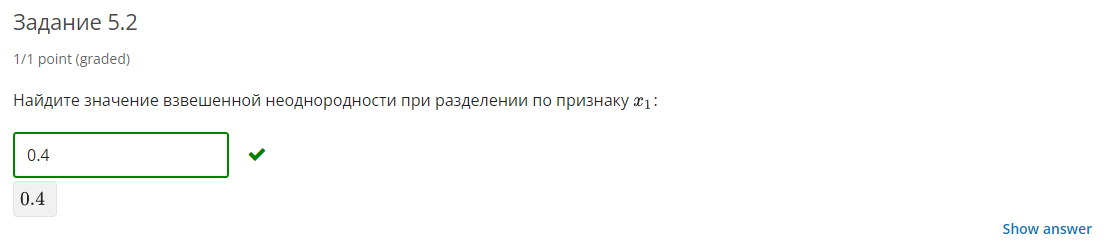
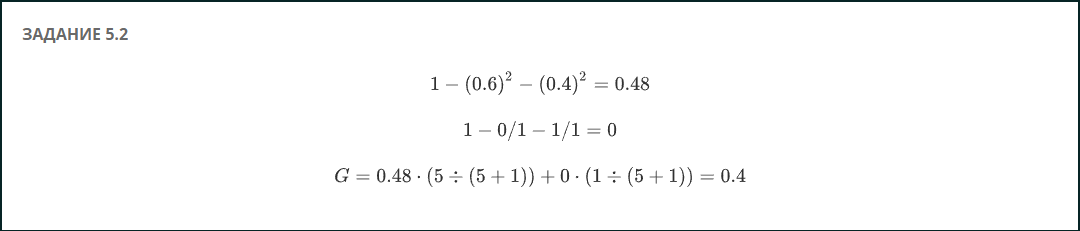

Далее мы будем использовать общую ошибку, чтобы вычислить вес, который получает этот пень. Общая ошибка равна сумме весов неправильно классифицированных объектов. Тогда получается, что если алгоритм классифицировал первый объект неверно, а остальные — верно, то суммарная ошибка в нашем случае равна 1/6.

Так как мы узнали ошибку, то можем рассчитать вес нового алгоритма:

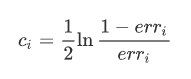

В нашем случае:

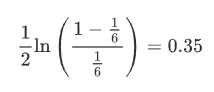

Далее мы увеличиваем веса объектов, которые были неправильно классифицированы, и уменьшаем веса объектов, которые были классифицированы правильно, используя следующее правило:

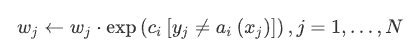

Веса нормализуются, чтобы в сумме давать единицу:

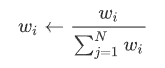

В результате получаем следующие данные:

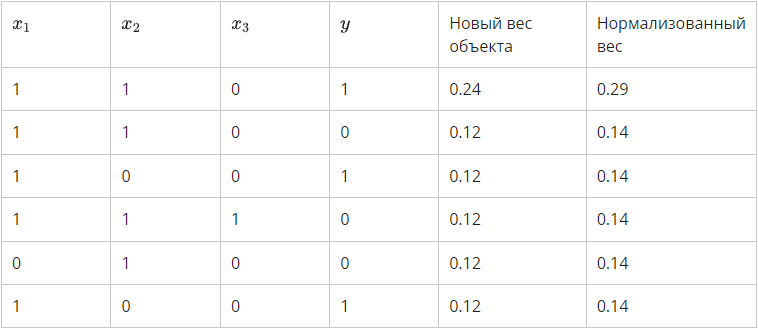

Таким образом, мы смогли рассчитать новые веса выборки. Поскольку сумма весов равняется 0.84, мы нормализовали веса выборки, разделив каждый вес на 0.84, чтобы сумма новых весов выборки равнялась 1.

Теперь мы формируем новую выборку такого же объёма с повтором.

## Обратите внимание, что объект, который был классифицирован неправильно, имеет вес, более чем в два раза превышающий вес других объектов. Это означает, что он с большей вероятностью будет выбран несколько раз, и, таким образом, следующий пень будет больше сосредоточен на правильной классификации неправильно классифицированного образца. В этом и состоит идея AdaBoost.

Для того чтобы классифицировать новую точку, мы узнаём предсказание для неё на каждом пне. Затем количество голосов за каждый класс суммируется, и класс с наибольшим количеством голосов становится меткой нашей точки.

Итак, мы разобрались с AdaBoost. **Преимущества и недостатки** этого алгоритма мы изучали, когда только начинали знакомство ним. Давайте вспомним их ↓

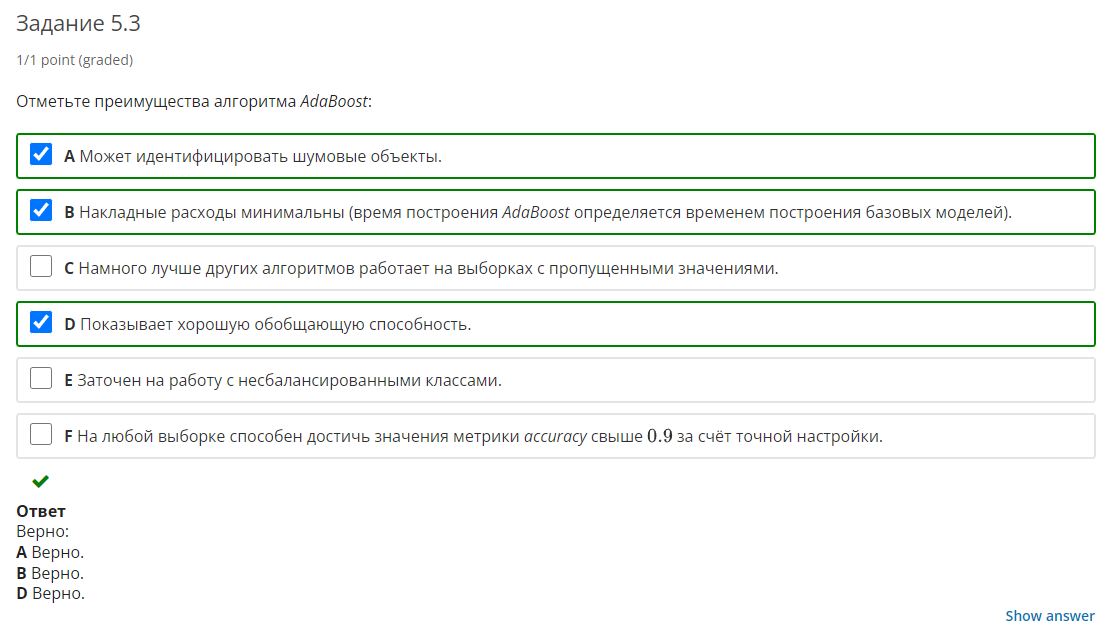
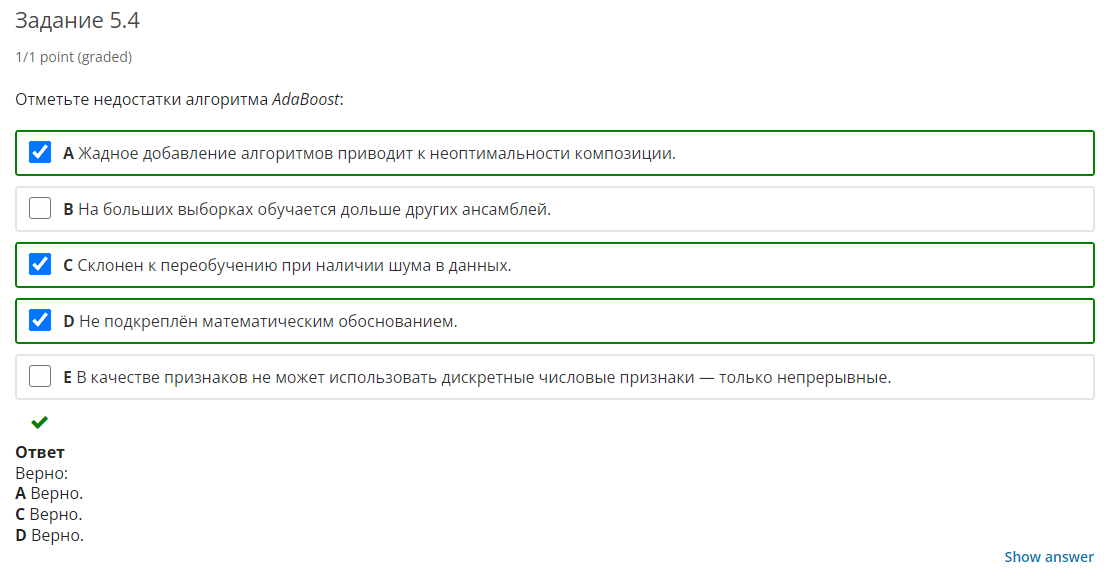

# **ГРАДИЕНТНЫЙ БУСТИНГ**

Переходим к следующему алгоритму, который очень популярен благодаря своей высокой эффективности, — к **градиентному бустингу**.

*Принцип его работы аналогичен AdaBoost: следующие модели улучшают композицию построенных ранее.*

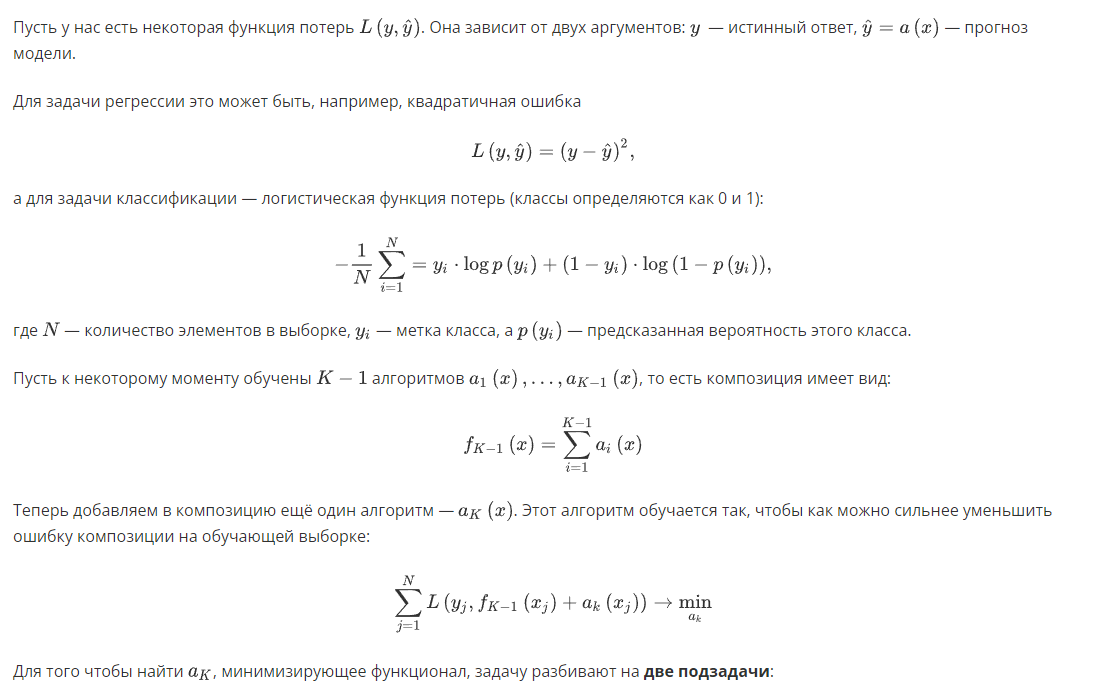
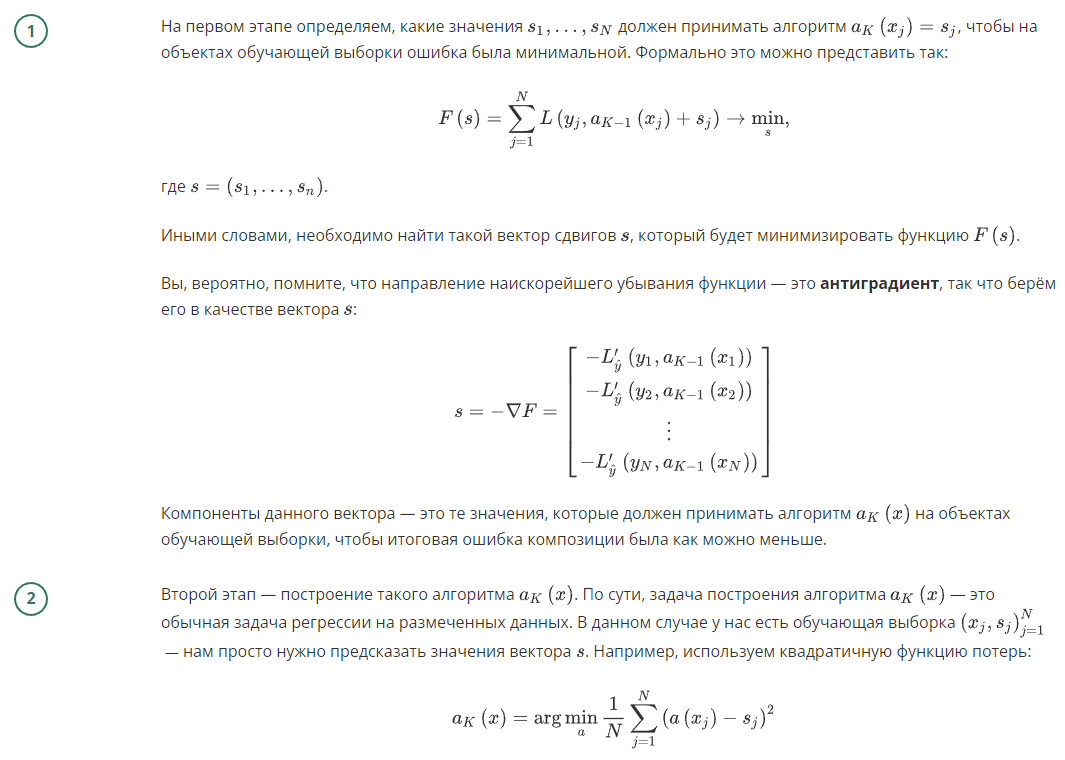

Запишем **последовательность шагов реализации алгоритма**, которую можно запрограммировать:

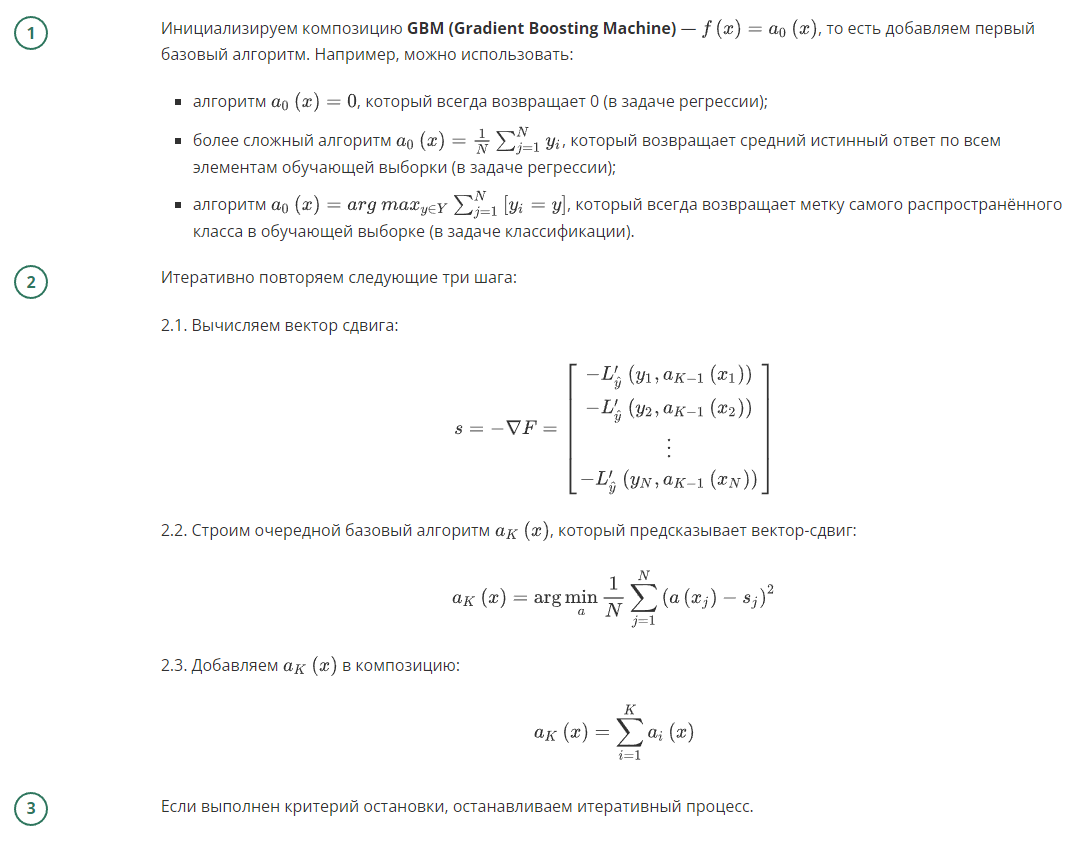

Давайте рассмотрим алгоритм на простейшем примере, чтобы лучше усвоить все шаги ↓

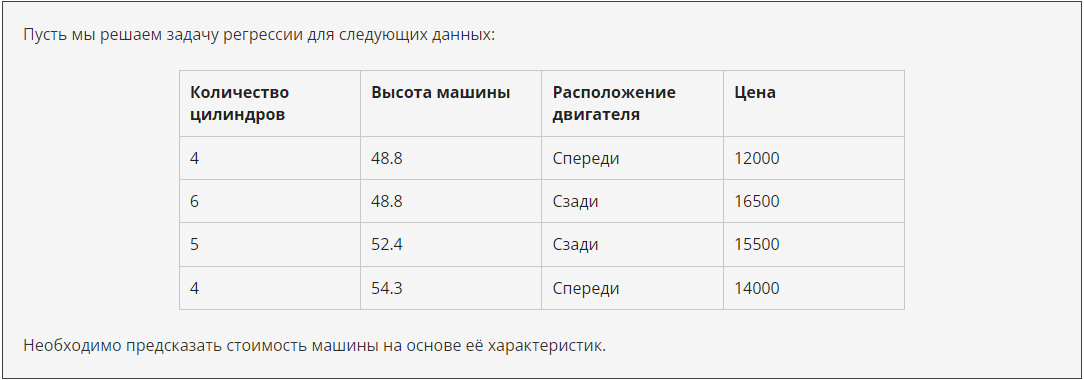

Будем решать данную задачу с помощью градиентного бустинга над решающими деревьями.

Для начала, в соответствии с описанным выше алгоритмом, нам необходимо инициализировать GBM базовым алгоритмом. Сделаем это с помощью среднего значения целевой переменной.

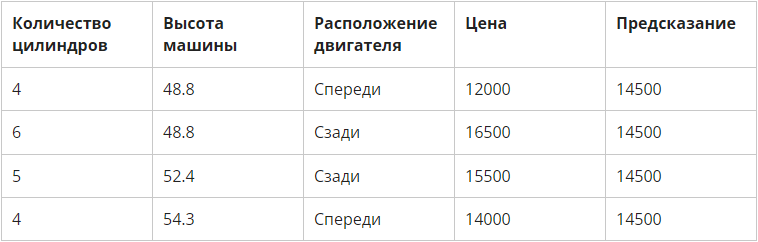

Почему именно с помощью среднего значения, а не другого константного? Дело в том, что именно в среднем будет минимальное значение функции потерь. Давайте это докажем.

Так как мы решаем задачу регрессии, то возьмём классическую для этого случая метрику MSE:

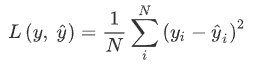

Чтобы найти минимум, необходимо найти производную — вам это уже известно из модулей по математическому анализу. Производная:

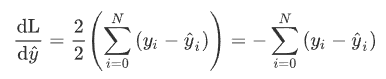

Мы видим, что здесь антиградиентом является разница между реальным значением функции и предсказываемым — обычно эту разницу называют **псевдоостатками**.

Если мы подставим значения из нашего примера, результат будет следующим:

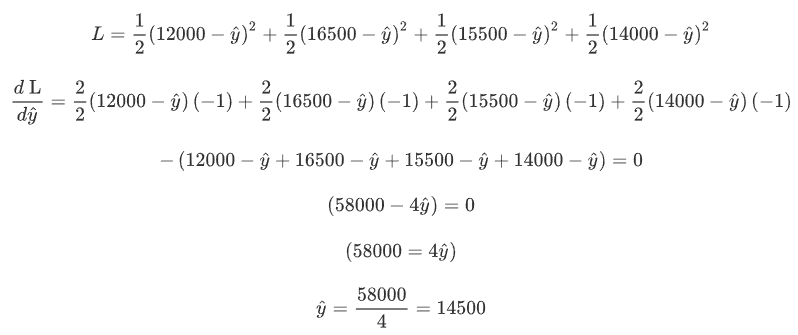

Собственно, мы получили как раз среднее арифметическое.

Далее вычисляем псевдоостатки:

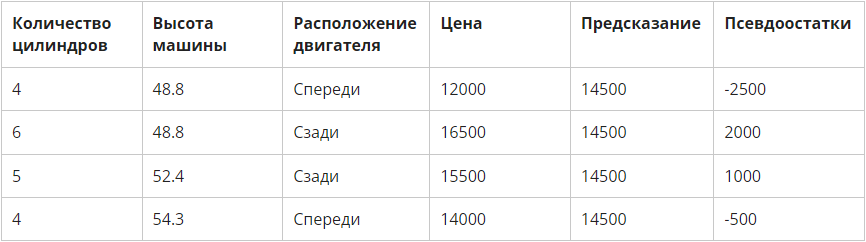

На следующем шаге мы строим регрессионную модель, которая будет предсказывать псевдоостатки.

Находим значения для всех листьев нашего дерева решений. Предположим, дерево получилось таким:

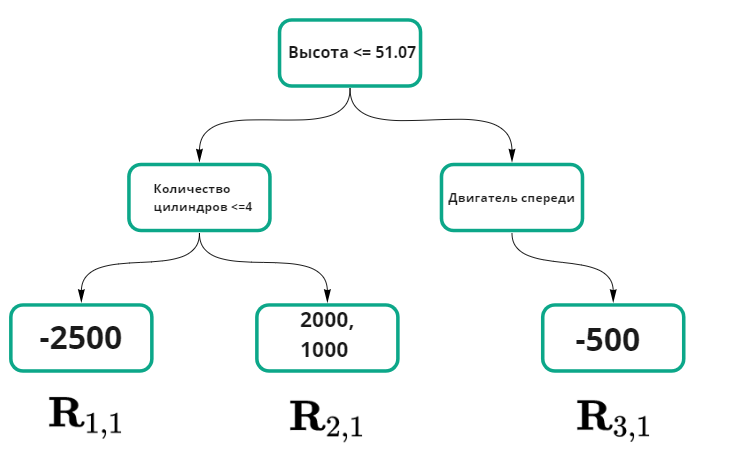

Нужно оставить в каждом листе по одному значению, которое будет минимизировать функцию: это либо сам остаток, либо среднее арифметическое чисел, если в листе их несколько.

Мы берём именно эти значения, так как нам необходимо минимизировать разницу между реальной ценой и предсказанием. В алгоритме градиентного бустинга выше мы прописывали, что таким образом мы будем строить очередной базовый алгоритм, предсказывающий вектор-сдвиг:

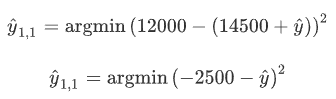

Скорее всего, из модуля по математическому анализу вы помните, что для того, чтобы найти точку минимума функции, необходимо приравнять значение производной к нулю. Давайте сделаем это:

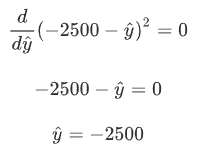

Для второго листа:

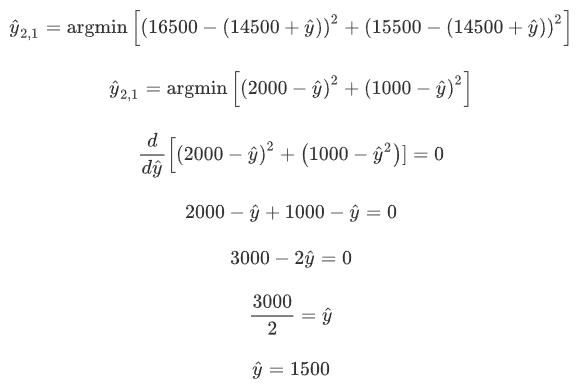

Для третьего листа:

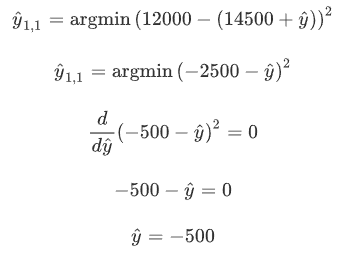
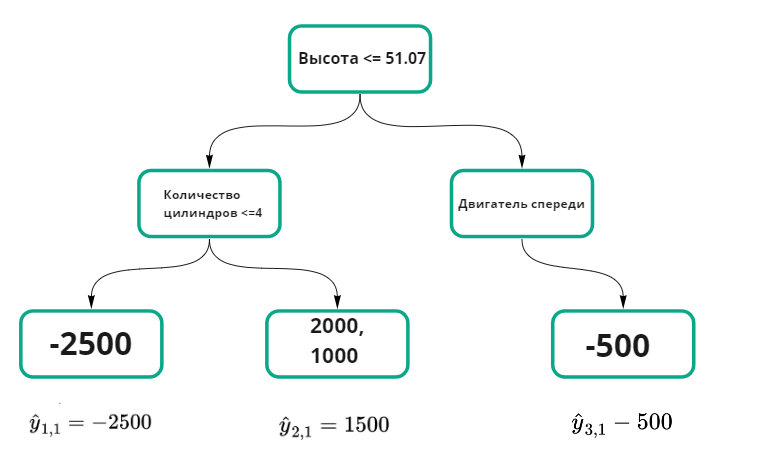



Теперь, наконец, обновляем нашу модель:

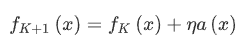
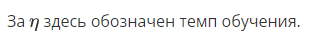

По сути, у нас получился уже известный вам алгоритм градиентного спуска, который реализован в пространстве ответов ансамбля.

Схематично это можно изобразить так:

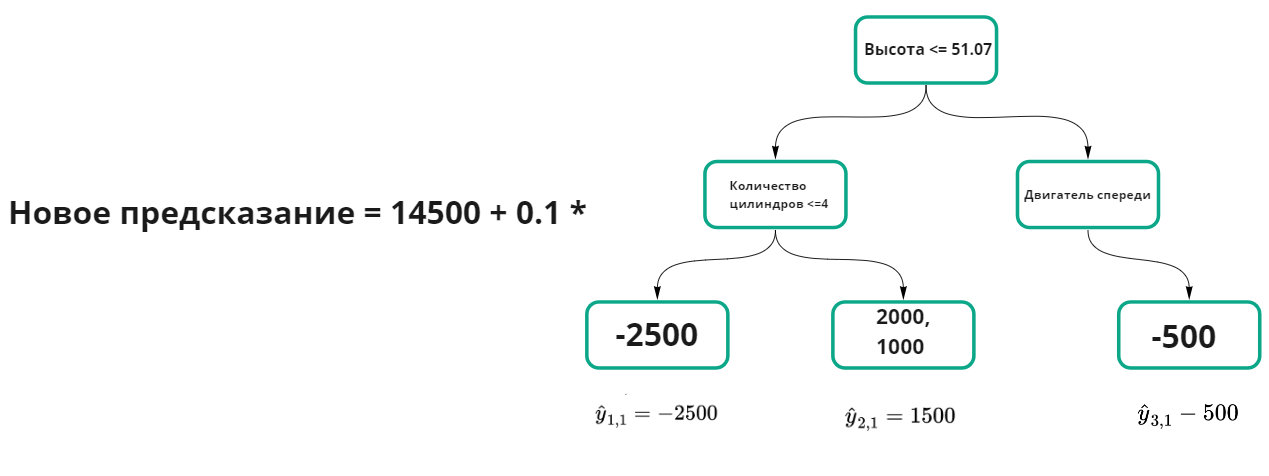

Далее мы продолжаем повторять аналогичную процедуру, достраивая новые деревья в модель.

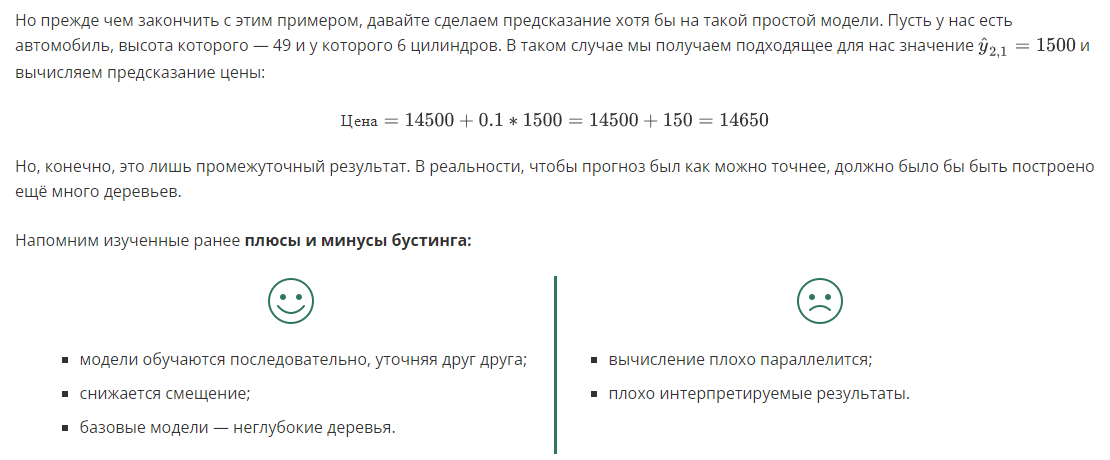

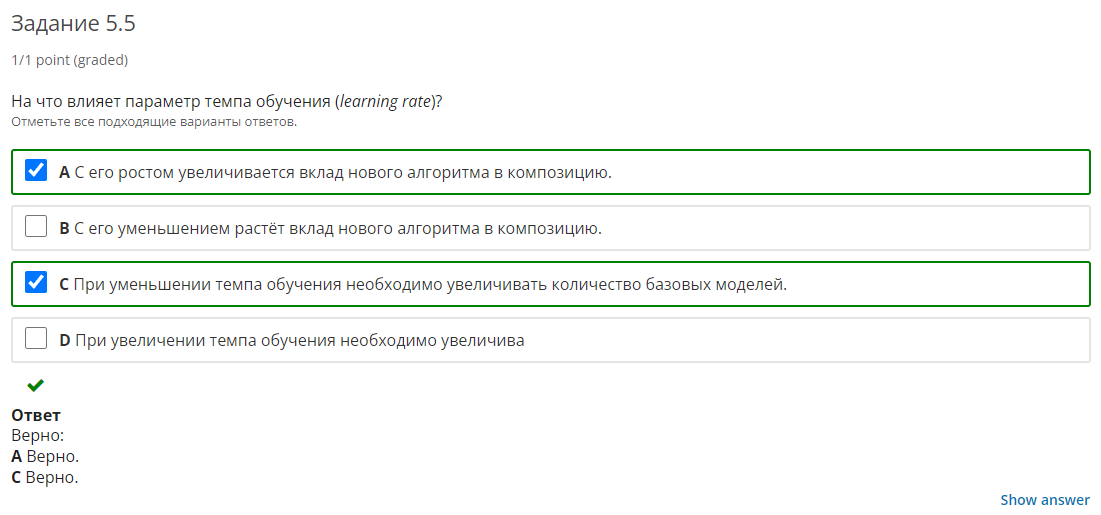

# **XGBOOST И CATBOOST**

Теперь, когда мы разобрались с градиентным бустингом, необходимо также упомянуть о двух его популярных на данный момент вариациях — **XGBoost** и **CatBoost**.

## **XGBoost** — одна из самых эффективных реализаций алгоритма Gradient Boosted Trees. Название *XGBoost* расшифровывается  как e**X**treme **G**radient **Boost**ing. *XGBoost* — это улучшение GBM через системную оптимизацию и усовершенствование алгоритма.

У XGBoost есть ряд существенных улучшений по сравнению с классической реализацией градиентного бустинга:

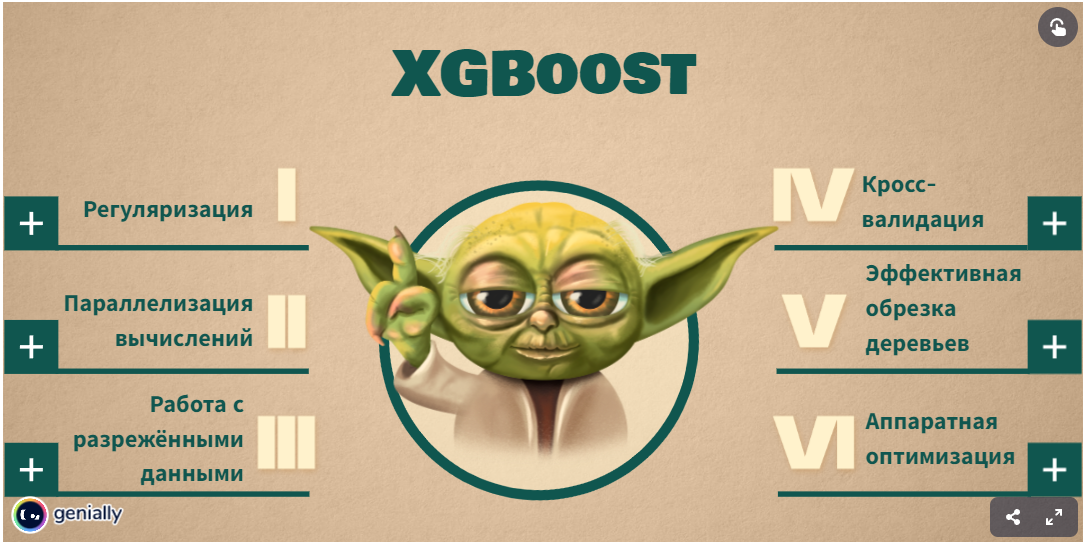

1. Регуляризация 

В алгоритме XGBoost есть встроенные L1- и L2-регуляризации, которые предотвращают переобучение. Из-за этого XGBoost ещё иногда называют **регуляризованным GBM**.

2. Параллелизация вычислений

XGBoost использует параллельные вычисления, поэтому он работает быстрее, чем классический GBM.

3. Работа с разряженными данными

В алгоритме XGBoost есть встроенная возможность для обработки пропусков: при встрече с пропущенным значением алгоритм пробует различные варианты разделения и ищет оптимальное.

4. Кросс-валидация

XGBoost позволяет реализовывать кросс-валидацию на каждой итерации алгоритма.

5. Эффективная образка деревьев.

XGBoost использует для обрезки более совершенный с точки зрения вычислительной производительности алгоритм.

## **CatBoost** — это библиотека градиентного бустинга, созданная Яндексом. Её особенность заключается в том, что в ней используются так называемые **небрежные (oblivious) деревья решений**, чтобы «вырастить» сбалансированное дерево.

*Небрежные деревья — это такие деревья, в которых одни и те же функции используются для левого и правого разбиения на одном уровне дерева:*

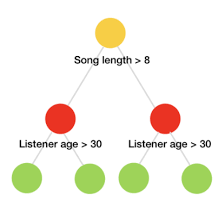

## Одно из главных преимуществ CatBoost заключается в том, что его можно использовать для данных, где категориальные признаки заранее не были преобразованы.

### Итак, мы разобрались с очень важным видом ансамблей — бустингом и рассмотрели несколько его моделей:

+ AdaBoost — самый простой вариант бустинга;
+ GBM — классический градиентный бустинг;
+ XGBoost — улучшенная версия градиентного бустинга;
+ CatBoost — улучшенная версия градиентного бустинга, адаптированная для работы с категориальными переменными.

Уже в следующем юните мы отработаем полученные знания на практике →

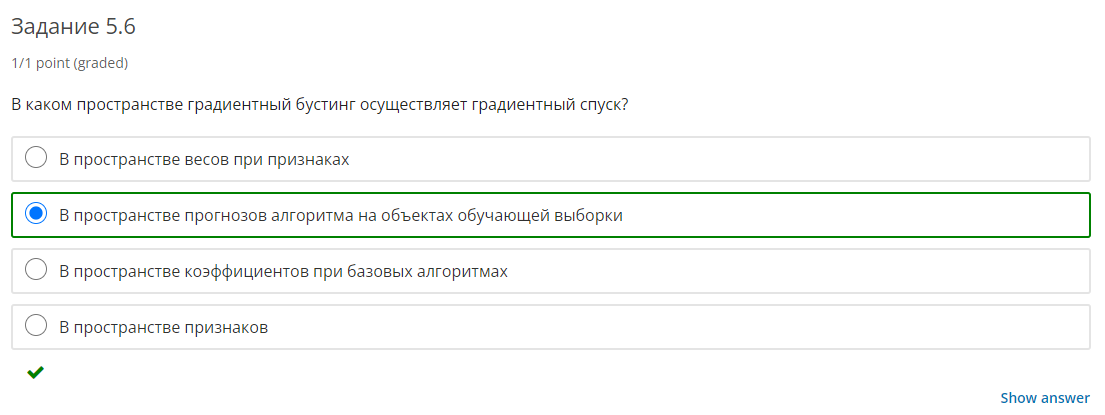
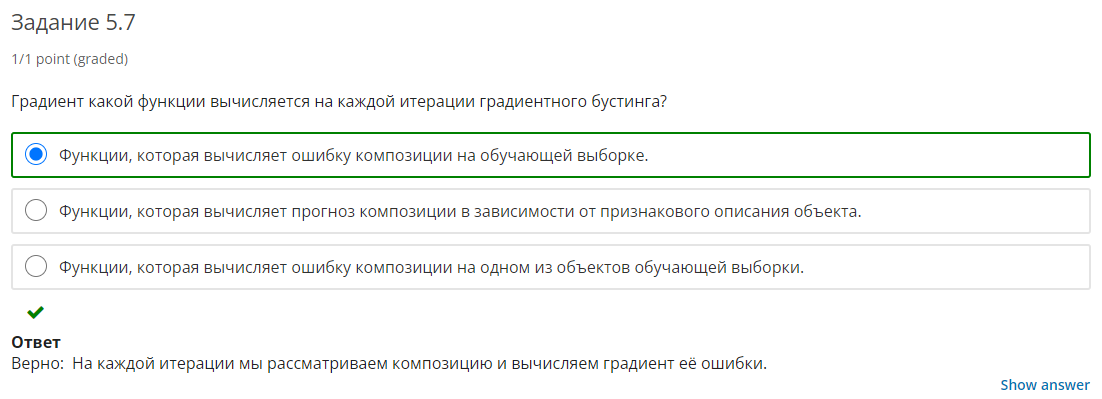